In [43]:
import re

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)

In [44]:
df_raw = pd.read_excel("./data/data_hir.xlsx")
df_raw = df_raw.drop(0)

In [45]:
def plot_experience(Prefixe_of_experience, column, df_raw, y_lim=None):
    df_programming_lang = df_raw[[column]]
    df_programming_lang.loc[:, column] = df_programming_lang[column].dropna().astype({column: int})
    tmp = dict(df_programming_lang.value_counts().sort_index())
    data = {}

    if (1.0,) in tmp.keys():
        data["no experience"] = tmp[(1.0,)]
    else:
        data["no experience"] = 0

    if (2.0,) in tmp:
        data["little experience"] = tmp[(2.0,)]
    else:
        data["little experience"] = 0

    if (3.0,) in tmp:
        data["average"] = tmp[(3.0,)]
    else:
        data["average"] = 0

    if (4.0,) in tmp:
        data["experienced"] = tmp[(4.0,)]
    else:
        data["experienced"] = 0

    if (5.0,) in tmp:
        data["proficient"] = tmp[(5.0,)]
    else:
        data["proficient"] = 0

    names, counts = zip(*data.items())
    plt.ylim(y_lim)
    plt.bar(names, counts)
    plt.title(Prefixe_of_experience + " Experience")
    plt.xticks(rotation=350)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()


def plot_self_assessment(Prefixe_of_experience, column, df_raw):
    df_programming_lang = df_raw[[column]]
    df_programming_lang.loc[:, column] = df_programming_lang[column].dropna().astype({column: int})
    tmp = dict(df_programming_lang.value_counts().sort_index())
    data = {}

    if (1.0,) in tmp.keys():
        data["significantly worse"] = tmp[(1.0,)]
    else:
        data["significantly worse"] = 0

    if (2.0,) in tmp:
        data["worse"] = tmp[(2.0,)]
    else:
        data["worse"] = 0

    if (3.0,) in tmp:
        data["same"] = tmp[(3.0,)]
    else:
        data["same"] = 0

    if (4.0,) in tmp:
        data["better"] = tmp[(4.0,)]
    else:
        data["better"] = 0

    if (5.0,) in tmp:
        data["significantly better"] = tmp[(5.0,)]
    else:
        data["significantly better"] = 0

    names, counts = zip(*data.items())
    plt.bar(names, counts)
    plt.title("Programming Experience Compared to " + Prefixe_of_experience)
    plt.xticks(rotation=350)
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

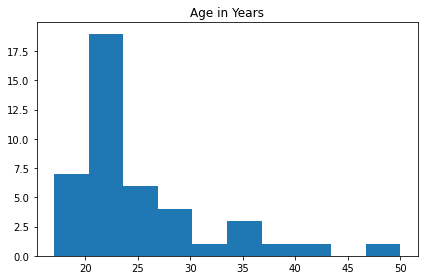

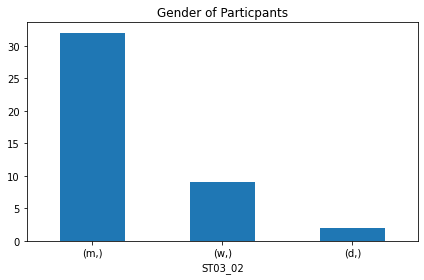

In [46]:
df_age = df_raw[["ST03_01"]].dropna().astype({"ST03_01": int})
df_age.hist()
plt.title("Age in Years")
plt.grid(b=None)
plt.tight_layout()
plt.show()

df_sex = df_raw[["ST03_02"]].dropna()
df_sex["ST03_02"] = df_sex["ST03_02"].apply(lambda sex: "w" if sex == "f" or sex == "F" or sex == "W" else sex)
df_sex["ST03_02"] = df_sex["ST03_02"].apply(lambda sex: "m" if sex == "M" else sex)
df_sex.value_counts().plot(kind="bar")
plt.title("Gender of Particpants")
plt.xticks(rotation="horizontal")
plt.tight_layout()
plt.show()

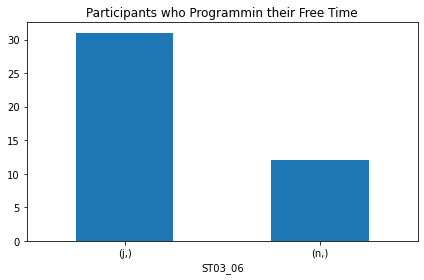

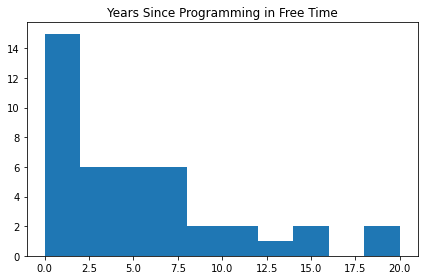

In [47]:
df_free_time_programming = df_raw[["ST03_06"]].dropna()
df_free_time_programming["ST03_06"] = df_free_time_programming["ST03_06"].apply(
    lambda flag: "n" if flag == "N" else flag
)
df_free_time_programming["ST03_06"] = df_free_time_programming["ST03_06"].apply(
    lambda flag: "j" if flag == "J" or flag == "y" or flag == "Y" else flag
)
df_free_time_programming.value_counts().plot(kind="bar")
plt.title("Participants who Programmin their Free Time")
plt.xticks(rotation="horizontal")
plt.tight_layout()
plt.show()

df_years_free_porgramming = df_raw[["ST03_03"]]
df_years_free_porgramming.loc[:, "ST03_03"] = df_years_free_porgramming["ST03_03"].apply(
    lambda years: list(re.findall(r"\d+", years))[0] if len(re.findall(r"\d+", str(years))) > 0 else float("NaN")
)
df_years_free_porgramming.loc[:, "ST03_03"] = df_years_free_porgramming["ST03_03"].dropna().astype({"ST03_03": int})
df_years_free_porgramming.hist()
plt.title("Years Since Programming in Free Time")
plt.grid(b=None)
plt.tight_layout()
plt.show()

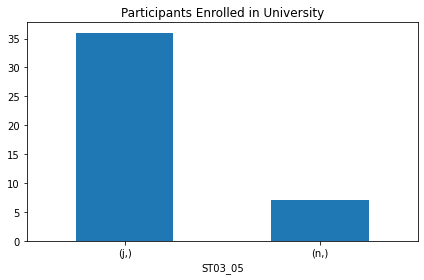

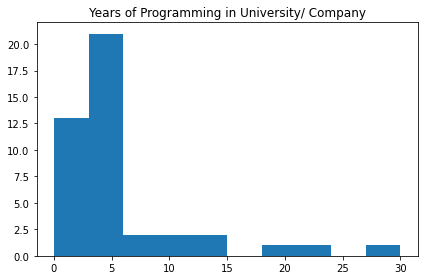

In [48]:
df_university = df_raw[["ST03_05"]].dropna()
df_university["ST03_05"] = df_university["ST03_05"].apply(lambda flag: "n" if flag == "N" else flag)
df_university["ST03_05"] = df_university["ST03_05"].apply(
    lambda flag: "j" if flag == "J" or flag == "y" or flag == "Y" else flag
)
df_university.value_counts().plot(kind="bar")
plt.title("Participants Enrolled in University")
plt.xticks(rotation="horizontal")
plt.tight_layout()
plt.show()

df_years_porgramming = df_raw[["ST03_04"]]
df_years_porgramming.loc[:, "ST03_04"] = df_years_porgramming["ST03_04"].apply(
    lambda years: list(re.findall(r"\d+", years))[0] if len(re.findall(r"\d+", str(years))) > 0 else float("NaN")
)
df_years_porgramming.loc[:, "ST03_04"] = df_years_porgramming[["ST03_04"]].dropna().astype({"ST03_04": int})
df_years_porgramming.hist()
plt.title("Years of Programming in University/ Company")
plt.xticks(rotation="horizontal")
plt.grid(b=None)
plt.tight_layout()
plt.show()

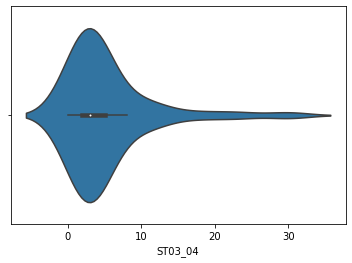

In [49]:
import seaborn as sns
ax = sns.violinplot(x=df_years_porgramming["ST03_04"])

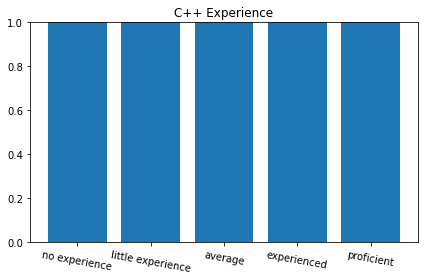

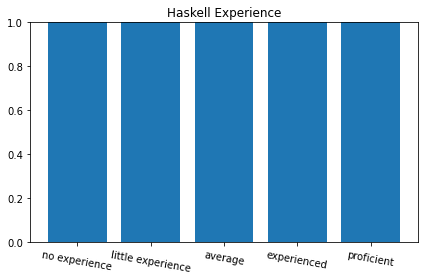

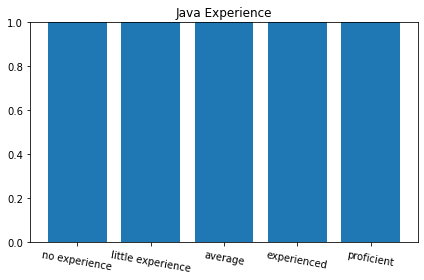

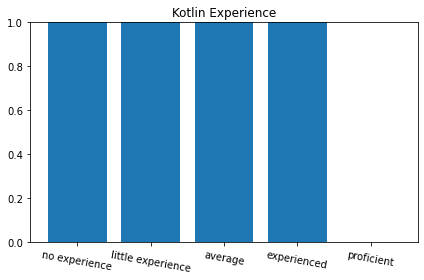

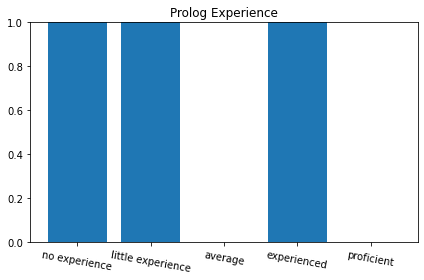

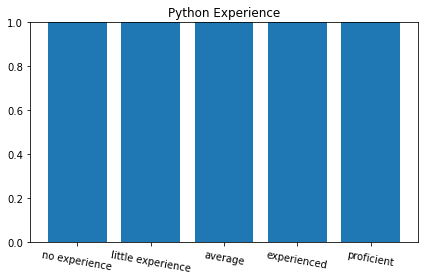

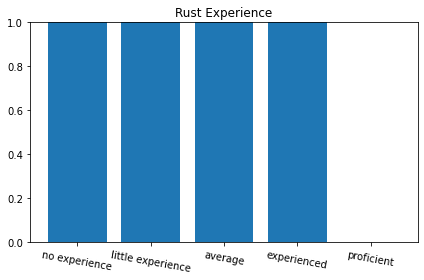

In [50]:
plot_experience("C++", "ST04_01", df_raw)
plot_experience("Haskell", "ST04_03", df_raw)
plot_experience("Java", "ST04_02", df_raw)
plot_experience("Kotlin", "ST04_07", df_raw)
plot_experience("Prolog", "ST04_05", df_raw)
plot_experience("Python", "ST04_04", df_raw)
plot_experience("Rust", "ST04_06", df_raw)

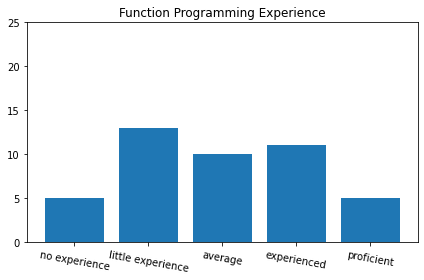

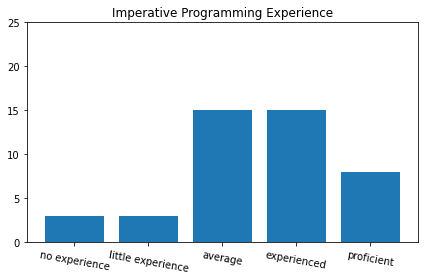

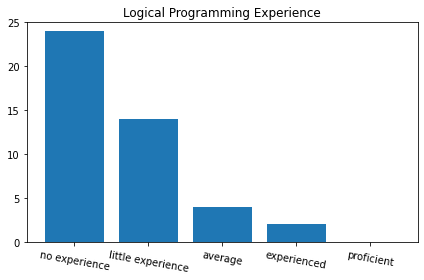

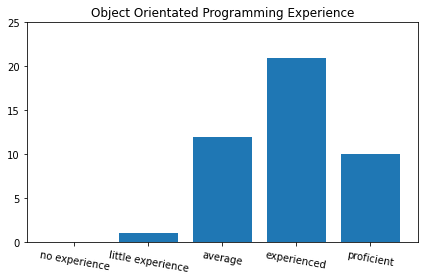

In [51]:
plot_experience("Function Programming", "ST05_03", df_raw,(0,25))
plot_experience("Imperative Programming", "ST05_02", df_raw,(0,25))
plot_experience("Logical Programming", "ST05_01", df_raw,(0,25))
plot_experience("Object Orientated Programming", "ST05_04", df_raw,(0,25))

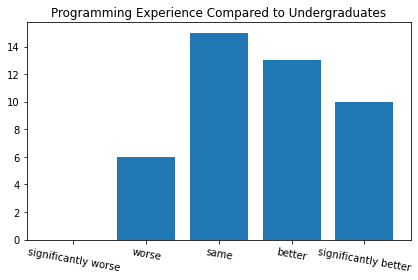

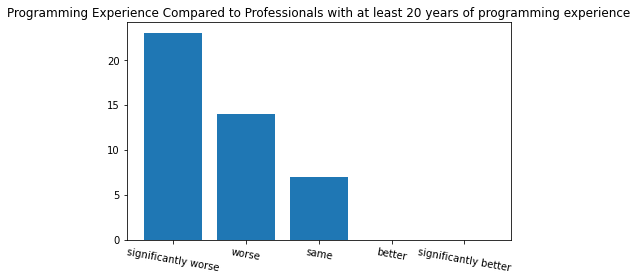

In [52]:
plot_self_assessment("Undergraduates", "ST06_02", df_raw, )
plot_self_assessment("Professionals with at least 20 years of programming experience", "ST06_03", df_raw)

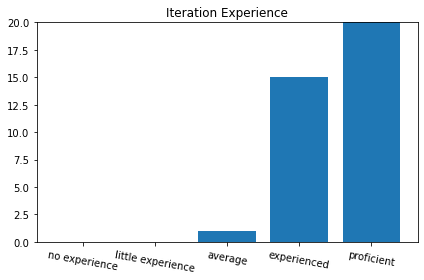

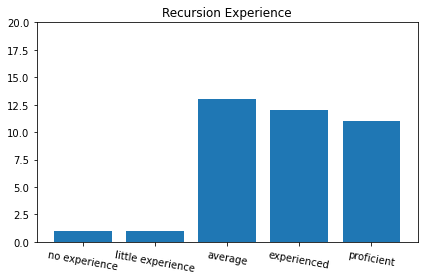

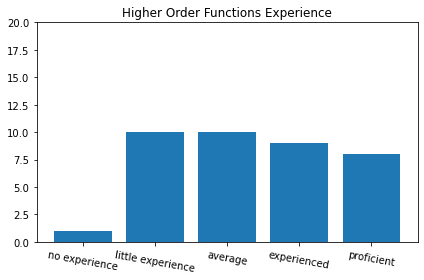

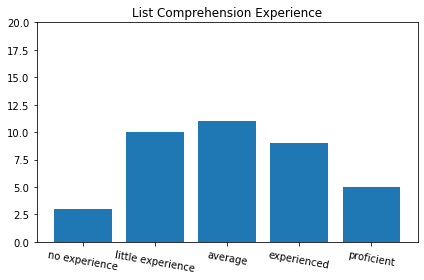

In [53]:
plot_experience("Iteration", "ST12", df_raw, (0,20))
plot_experience("Recursion", "ST13", df_raw, (0,20))
plot_experience("Higher Order Functions", "ST14", df_raw, (0,20))
plot_experience("List Comprehension", "ST15", df_raw, (0,20))

In [55]:
config_prefix = ["IT", "RE", "HO", "LC"]
config_prefix_variable = ["IV", "RV", "HV", "LV"]

config_id_variable = "CASE"

config_algo_names = [
    "apply",
    "condition",
    "find",
    "is_prime",
    "max",
    "node",
    "prime_factors",
    "quad_mul",
    "students",
    "computer",
    "store",
    "LinkedList",
]

config_answer_variables = [
    [[prefix + str(x).zfill(2) + "_01", prefix + str(x).zfill(2) + "_01a"] for x in range(15, 27)]
    for prefix in config_prefix
]

config_click_variables = [[prefix + str(x).zfill(2) + "_01" for x in range(2, 14)] for prefix in config_prefix_variable]

config_time_variables = [[prefix + str(x).zfill(2) + "_02" for x in range(2, 14)] for prefix in config_prefix_variable]


config_answer_patterns = [
    '^"?\[2,\s?6,\s?12\]"?$',
    '^"?42"?$',
    '^"?\[?2\]?"?$',
    '^"?(True|true)"?$',
    '^"?5"?$',
    '^"?36"?$',
    '^"?\[2,\s?3\]"?$',
    '^"?36"?$',
    '^"?(\["Jasmin",\s?"Florian"\]|\[Jasmin,\s?Florian\])"?$',
    '^"?\[1,\s?5\]"?$',
    '^"?\[0,\s?3\]"?$',
    '^"?16"?$',
]

In [56]:
df_matrix = []

# load data
for algo_idx, _stuff in enumerate(config_algo_names):
    df_array = []
    for detail_idx, _stuff in enumerate(config_prefix_variable):
        df = pd.DataFrame(
            df_raw,
            columns=[
                config_id_variable,
                config_answer_variables[detail_idx][algo_idx][0],
                config_answer_variables[detail_idx][algo_idx][1],
                config_click_variables[detail_idx][algo_idx],
                config_time_variables[detail_idx][algo_idx],
            ],
        )
        df = df.dropna(subset=config_answer_variables[detail_idx][algo_idx], how="all")
        df_array.append(df)
    df_matrix.append(df_array)

In [26]:
cols = ["id", "algo_name", "answer", "correctness", "click_data", "time_data"]

df_IT = pd.DataFrame(columns=cols)
df_RE = pd.DataFrame(columns=cols)
df_HO = pd.DataFrame(columns=cols)
df_LC = pd.DataFrame(columns=cols)

for algo_idx, df_row in enumerate(df_matrix):
    algo_name = config_algo_names[algo_idx]
    pattern = config_answer_patterns[algo_idx]
    regex = re.compile(pattern)
    for detail_idx, df in enumerate(df_row):

        for index, row in df.iterrows():
            id_value = row["CASE"]
            algo_name = config_algo_names[algo_idx]
            answer = row[config_answer_variables[detail_idx][algo_idx]]
            click_data = row[config_click_variables[detail_idx][algo_idx]]
            time_data = row[config_time_variables[detail_idx][algo_idx]]

            result = regex.match(str(answer.iloc[0]))
            correctness = False

            if result is not None:
                correctness = True

            data = pd.DataFrame(
                [[id_value, algo_name, str(answer.iloc[0]), correctness, click_data, time_data]], columns=cols
            )

            if detail_idx == 0:
                df_IT = df_IT.append(data)
            elif detail_idx == 1:
                df_RE = df_RE.append(data)
            elif detail_idx == 2:
                df_HO = df_HO.append(data)
            else:
                df_LC = df_LC.append(data)

In [66]:
df_IT

,id,algo_name,answer,correctness,click_data,time_data
0,212,apply,nan,False,268-191 151-70 151-70 146-89 135-12 135-65 120...,10105 34435 35005 39192 47146 56587 61358 66794
0,245,apply,"[2,6,12]",True,156-17 174-195 129-44 131-62 141-93 141-114 14...,1123 3472 14145 14878 16035 19911 21078
0,272,apply,"""[2, 6, 12]""",True,188-192 104-34 132-69 149-89,16519 78023 79043 81561
0,296,apply,16,False,160-195 122-115 148-9 138-34 140-60 132-94 153...,4194 11386 13568 14369 15567 17215 21808 22825
0,302,apply,"[2, 6, 12]",True,69-204 84-191 150-197 254-200 183-14 85-36 95-...,4193 5008 5850 6351 8856 10441 11790 13309 20310
...,...,...,...,...,...,...
0,294,LinkedList,16,True,76-5 78-15 100-44 106-67 116-91 102-148 110-17...,6619 7130 7701 8320 9024 10552 10966 13288 142...
0,298,LinkedList,16,True,237-657 221-608 162-575 167-218 169-250 139-27...,120953 121887 125760 127233 127613 127983 1294...
0,314,LinkedList,16,True,76-12 114-37 114-67 116-86 123-148 125-167 105...,3267 3833 4393 4727 5291 5691 7316 8343 8809 9...
0,319,LinkedList,16,True,94-22 107-37 121-58 135-86 133-146 135-162 118...,2235 2842 3211 3860 5400 5709 6827 7209 7543 8...


In [27]:
df_array_independent = [df_IT, df_RE, df_HO, df_LC]

In [28]:
cols = ["ID", "ProgrammingStyle", "Algorithm", "ResponseTime", "Correctness", "ClickData", "TimeData"]


def fill(list_data, dataframe, programming_style):
    for idx, row in dataframe.iterrows():
        id = row["id"]
        algorithm = row["algo_name"]
        response_time = 0
        for i in str(row["time_data"]).split(" "):
            try:
                response_time = int(i)
            except:
                continue
        correctness = row["correctness"]
        click_data = row["click_data"]
        time_data = row["time_data"]

        list_data.append([id, programming_style, algorithm, response_time, correctness, click_data, time_data])


data = []
fill(data, df_IT, "iterative")
fill(data, df_RE, "recursive")
fill(data, df_HO, "higher-order")
fill(data, df_LC, "list-comprehension")
df = pd.DataFrame(data, columns=cols)
df.loc[(df["Algorithm"] == 'condition'),'Algorithm']='condition_sum'
df.to_excel("./results/preprocessed.xlsx", index=False)